In [1]:
from keras.models import Sequential
from keras.layers import Embedding,Dense,LSTM,Dropout
from keras.callbacks import EarlyStopping
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical


from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd
import pickle
import nltk
import re
from nltk.stem import PorterStemmer
import seaborn as sns

import matplotlib.pyplot as plt
from wordcloud import WordCloud


In [2]:
df = pd.read_csv('train.txt',sep=';',names=['comment','Emotion'],encoding = 'utf-8')
df['length'] = [len(x) for x in df['comment']]

In [3]:
df.shape

(16000, 3)

In [4]:
df.isnull().sum()

comment    0
Emotion    0
length     0
dtype: int64

In [5]:
df.duplicated().sum()

1

In [6]:
df


,comment,Emotion,length
0,i didnt feel humiliated,sadness,23
1,i can go from feeling so hopeless to so damned...,sadness,108
2,im grabbing a minute to post i feel greedy wrong,anger,48
3,i am ever feeling nostalgic about the fireplac...,love,92
4,i am feeling grouchy,anger,20
...,...,...,...
15995,i just had a very brief time in the beanbag an...,sadness,101
15996,i am now turning and i feel pathetic that i am...,sadness,102
15997,i feel strong and good overall,joy,30
15998,i feel like this was such a rude comment and i...,anger,59


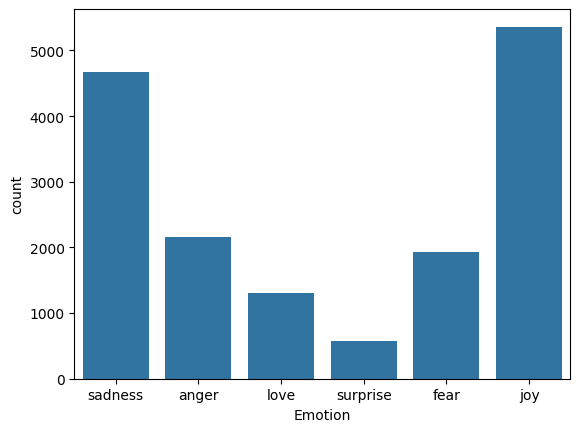

In [7]:
sns.countplot(data=df,x = df['Emotion'])
plt.show()

<Axes: xlabel='length', ylabel='Count'>

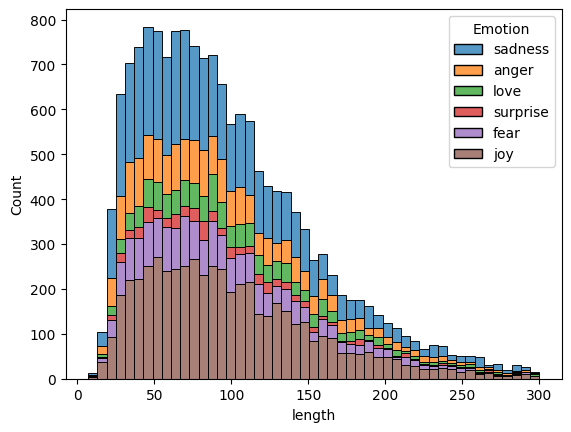

In [8]:
df2 = df.copy()
df2['length'] = [len(x) for x in df2['comment']]
sns.histplot(data=df2,x='length',hue="Emotion",multiple='stack')

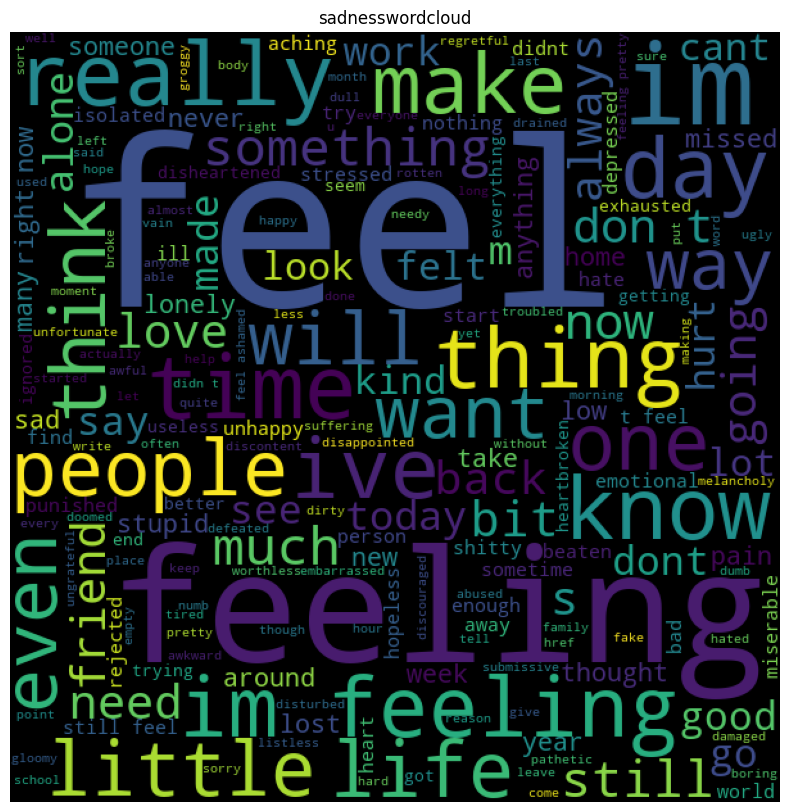

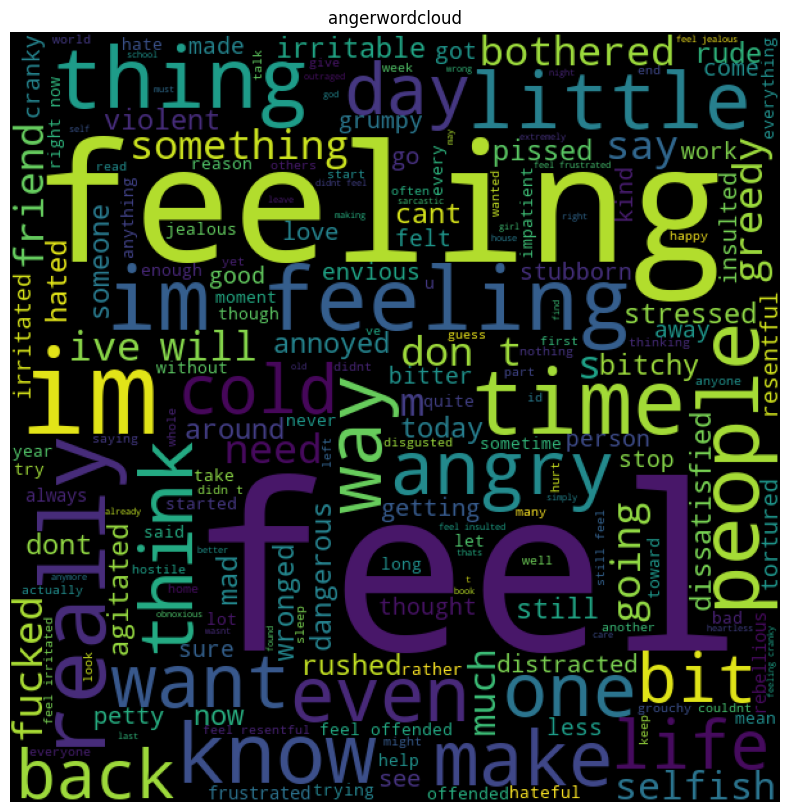

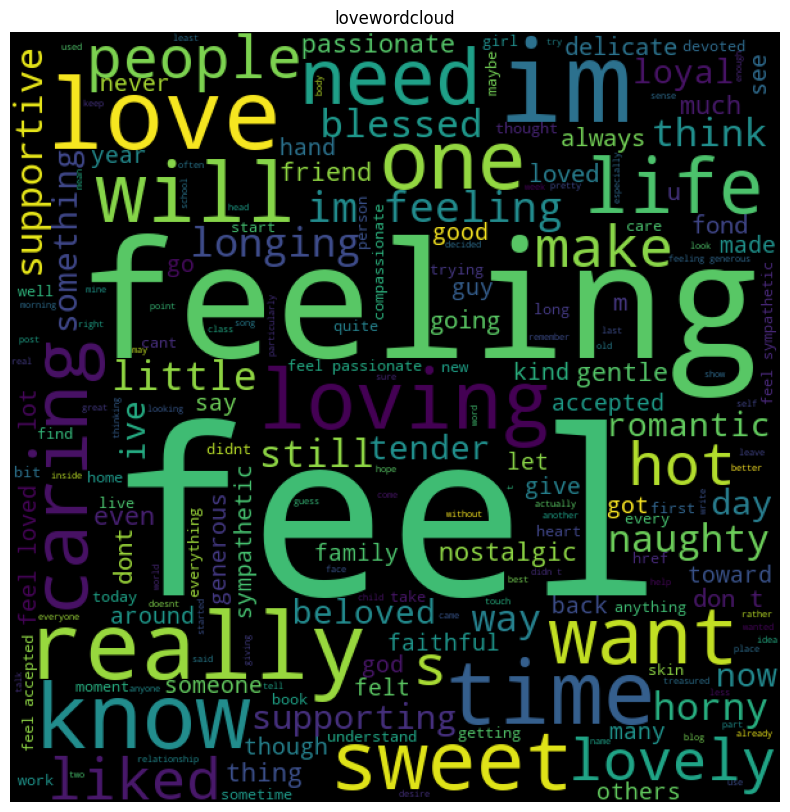

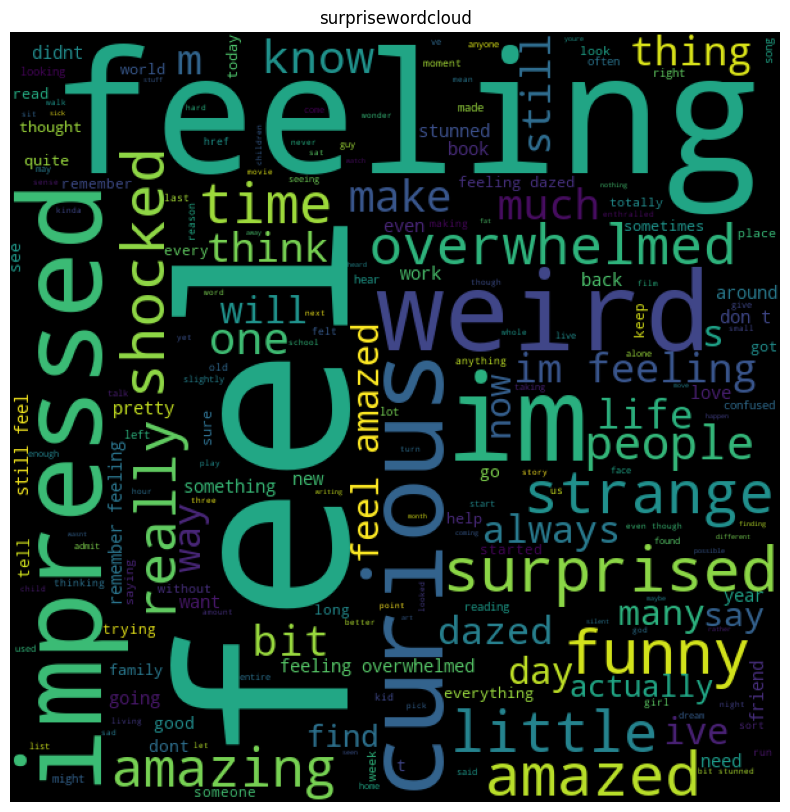

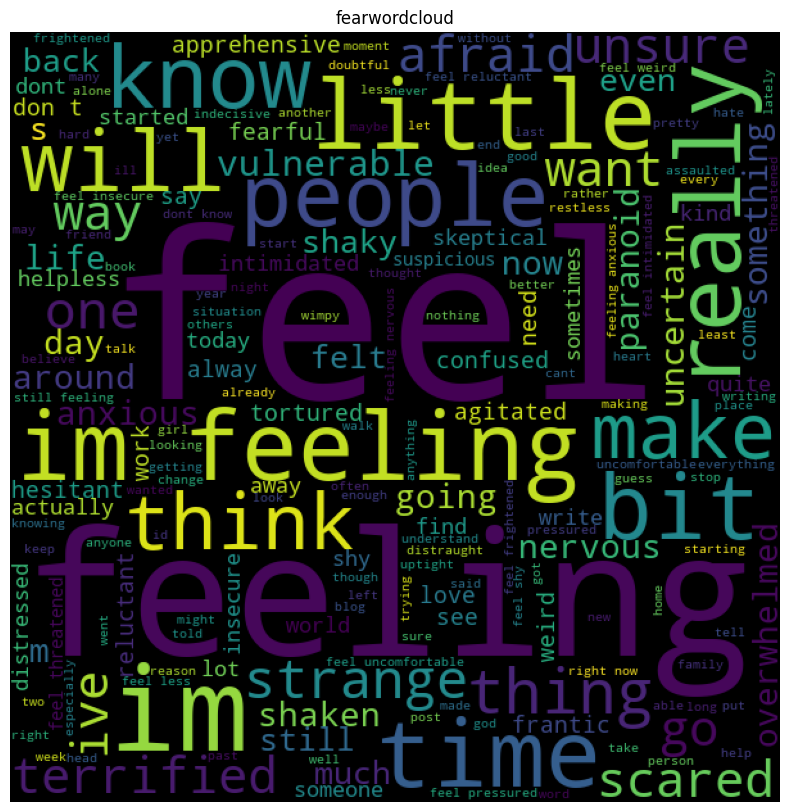

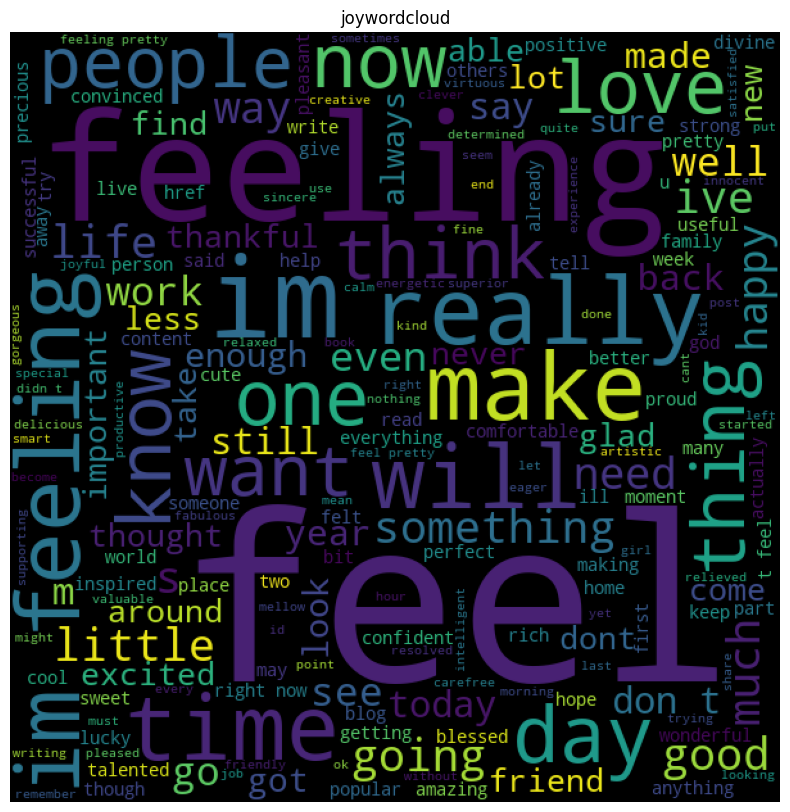

In [9]:
def words_cloud(wordcloud,df):
  plt.figure(figsize=(10,10))
  plt.title(df+"wordcloud")
  plt.imshow(wordcloud)
  plt.axis("off")
emotions = df['Emotion'].unique()
for emotion in emotions:
  text = ' '.join(sentence for sentence in df.loc[df['Emotion'] == emotion,'comment'])
  wordcloud = WordCloud(width=600,height=600).generate(text)
  words_cloud(wordcloud,emotion)

In [10]:
lb = LabelEncoder()
df['Emotion_encoded'] = lb.fit_transform(df['Emotion'])

# Data Preprocessing

In [86]:
df

,comment,Emotion,length,Emotion_encoded
0,i didnt feel humiliated,sadness,23,4
1,i can go from feeling so hopeless to so damned...,sadness,108,4
2,im grabbing a minute to post i feel greedy wrong,anger,48,0
3,i am ever feeling nostalgic about the fireplac...,love,92,3
4,i am feeling grouchy,anger,20,0
...,...,...,...,...
15995,i just had a very brief time in the beanbag an...,sadness,101,4
15996,i am now turning and i feel pathetic that i am...,sadness,102,4
15997,i feel strong and good overall,joy,30,2
15998,i feel like this was such a rude comment and i...,anger,59,0


# applying Machine Learning

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report

In [24]:
nltk.download('stopwords')
stopwords = set(nltk.corpus.stopwords.words('english'))
def clean_text(text):
  stemmer = PorterStemmer()
  text = re.sub("[^a-zA-Z]"," ",text)
  text = text.lower()
  text = text.split()
  text = [stemmer.stem(word) for word in text if word not in stopwords]
  return " ".join(text)
df['cleaned_comment'] = df['comment'].apply(clean_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tilak\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [26]:
df

,comment,Emotion,length,Emotion_encoded,cleaned_comment
0,i didnt feel humiliated,sadness,23,4,didnt feel humili
1,i can go from feeling so hopeless to so damned...,sadness,108,4,go feel hopeless damn hope around someon care ...
2,im grabbing a minute to post i feel greedy wrong,anger,48,0,im grab minut post feel greedi wrong
3,i am ever feeling nostalgic about the fireplac...,love,92,3,ever feel nostalg fireplac know still properti
4,i am feeling grouchy,anger,20,0,feel grouchi
...,...,...,...,...,...
15995,i just had a very brief time in the beanbag an...,sadness,101,4,brief time beanbag said anna feel like beaten
15996,i am now turning and i feel pathetic that i am...,sadness,102,4,turn feel pathet still wait tabl sub teach degre
15997,i feel strong and good overall,joy,30,2,feel strong good overal
15998,i feel like this was such a rude comment and i...,anger,59,0,feel like rude comment im glad


In [27]:
x_train,x_test,y_train,y_test = train_test_split(df['cleaned_comment'],df['Emotion_encoded'],random_state = 42,test_size=0.2)

In [28]:
# y_train = y_train.apply(lambda x:str(x))

In [29]:
# y_test = y_test.apply(lambda x:str(x))

In [30]:
# y_train = to_categorical(y_train)
# y_test = to_categorical(y_test)

In [34]:
x_train

676      refer cours though cant help feel somehow iron...
12113                       im start feel im suffer fatigu
7077     feel like probabl would like book littl bit si...
13005                                  realli feel awkward
12123    im feel littl grumpi today lame weather teas g...
                               ...                        
13418         love leav reader feel confus slightli deceiv
5390                                            feel delic
860                                start feel littl stress
15795                  feel stress tire worn shape neglect
7270             feel someon rude wrongli done someth lose
Name: cleaned_comment, Length: 12800, dtype: object

In [31]:
# Vectorization using TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(x_train)
X_test_tfidf = tfidf_vectorizer.transform(x_test)

In [32]:
X_train_tfidf

<12800x9257 sparse matrix of type '<class 'numpy.float64'>'
	with 115139 stored elements in Compressed Sparse Row format>

In [33]:
# Multi-class classification using different algorithms
classifiers = {
    "Multinomial Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(),
}

for name, clf in classifiers.items():
    print(f"\n===== {name} =====")
    clf.fit(X_train_tfidf, y_train)
    y_pred_tfidf = clf.predict(X_test_tfidf)
    accuracy_tfidf = accuracy_score(y_test, y_pred_tfidf)
    print(f"\nAccuracy using TF-IDF: {accuracy_tfidf}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred_tfidf))


===== Multinomial Naive Bayes =====

Accuracy using TF-IDF: 0.655
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.31      0.46       427
           1       0.91      0.24      0.38       397
           2       0.58      0.98      0.73      1021
           3       1.00      0.03      0.06       296
           4       0.70      0.91      0.79       946
           5       1.00      0.01      0.02       113

    accuracy                           0.66      3200
   macro avg       0.85      0.41      0.41      3200
weighted avg       0.76      0.66      0.58      3200


===== Logistic Regression =====


c:\Users\tilak\anaconda3\envs\EmoCls\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Accuracy using TF-IDF: 0.829375
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.79      0.83       427
           1       0.84      0.73      0.78       397
           2       0.78      0.94      0.85      1021
           3       0.80      0.49      0.61       296
           4       0.88      0.92      0.90       946
           5       0.77      0.45      0.57       113

    accuracy                           0.83      3200
   macro avg       0.82      0.72      0.76      3200
weighted avg       0.83      0.83      0.82      3200


===== Random Forest =====

Accuracy using TF-IDF: 0.84625
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.85      0.82       427
           1       0.84      0.84      0.84       397
           2       0.84      0.90      0.87      1021
           3       0.82      0.61      0.70       296
           4       0.90      0.88      0.89     

In [1]:
# selecting model
lg = LogisticRegression()
lg.fit(X_train_tfidf, y_train)
lg_y_pred = lg.predict(X_test_tfidf)

NameError: name 'LogisticRegression' is not defined

In [36]:
accuracy_score(y_test,lg_y_pred)

0.829375

In [38]:
def predict_emotion(input_text):
    cleaned_text = clean_text(input_text)
    input_vectorized = tfidf_vectorizer.transform([cleaned_text])

    # Predict emotion
    predicted_label = lg.predict(input_vectorized)[0]
    predicted_emotion = lb.inverse_transform([predicted_label])[0]
    label =  np.max(lg.predict(input_vectorized))

    return predicted_emotion,label

# Example usage
sentences = [
            "i didnt feel humiliated",
            "i feel strong and good overall",
            "im grabbing a minute to post i feel greedy wrong",
            "He was speechles when he found out he was accepted to this new job",
            "This is outrageous, how can you talk like that?",
            "I feel like im all alone in this world",
            "He is really sweet and caring",
            "You made me very crazy",
            "i am ever feeling nostalgic about the fireplace i will know that it is still on the property",
            "i am feeling grouchy",
            "He hates you",
            "i love you"
            ]
for sentence in sentences:
    print(sentence)
    pred_emotion, label = predict_emotion(sentence)
    print("Prediction :",pred_emotion)
    print("Label :",label)
    print("================================================================")

i didnt feel humiliated
Prediction : sadness
Label : 4
i feel strong and good overall
Prediction : joy
Label : 2
im grabbing a minute to post i feel greedy wrong
Prediction : anger
Label : 0
He was speechles when he found out he was accepted to this new job
Prediction : joy
Label : 2
This is outrageous, how can you talk like that?
Prediction : anger
Label : 0
I feel like im all alone in this world
Prediction : sadness
Label : 4
He is really sweet and caring
Prediction : love
Label : 3
You made me very crazy
Prediction : sadness
Label : 4
i am ever feeling nostalgic about the fireplace i will know that it is still on the property
Prediction : love
Label : 3
i am feeling grouchy
Prediction : anger
Label : 0
He hates you
Prediction : anger
Label : 0
i love you
Prediction : love
Label : 3


In [96]:
# Text cleaning function
def text_cleaning(df, column, vocab_size, max_len):
    stemmer = PorterStemmer()
    corpus = []

    for text in df[column]:
        text = re.sub("[^a-zA-Z]", " ", text)
        text = text.lower()
        text = text.split()
        text = [stemmer.stem(word) for word in text if word not in stopwords]
        text = " ".join(text)
        corpus.append(text)

    one_hot_word = [one_hot(input_text=word, n=vocab_size) for word in corpus]
    pad = pad_sequences(sequences=one_hot_word, maxlen=max_len, padding='pre')
    return pad

# Text cleaning and encoding
x_train = text_cleaning(df, "comment", vocab_size=11000, max_len=300)
y_train = to_categorical(df["Emotion_encoded"])
print(type(y_train[1]))

<class 'numpy.ndarray'>


In [97]:
print(y_train[20])

[1. 0. 0. 0. 0. 0.]


In [30]:
df['Emotion']

0        4
1        4
2        0
3        3
4        0
        ..
15995    4
15996    4
15997    2
15998    0
15999    4
Name: Emotion, Length: 16000, dtype: int64

In [103]:
# Build and compile the model
model = Sequential()
model.add(Embedding(input_dim=11000, output_dim=150, input_length=300))
model.add(Dropout(0.2))
model.add(LSTM(128))
model.add(Dropout(0.2))
model.add(Dense(64, activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(6, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
callback = EarlyStopping(monitor="val_loss", patience=2, restore_best_weights=True)
model.fit(x_train, y_train, epochs=20, batch_size=64, verbose=1, callbacks=[callback])

Epoch 1/20
249/250 [============================>.] - ETA: 0s - loss: 1.4934 - accuracy: 0.4031

250/250 [==============================] - 15s 53ms/step - loss: 1.4920 - accuracy: 0.4039
Epoch 2/20
250/250 [==============================] - ETA: 0s - loss: 0.6238 - accuracy: 0.7950

250/250 [==============================] - 6s 24ms/step - loss: 0.6238 - accuracy: 0.7950
Epoch 3/20
250/250 [==============================] - ETA: 0s - loss: 0.3008 - accuracy: 0.9046

250/250 [==============================] - 5s 21ms/step - loss: 0.3008 - accuracy: 0.9046
Epoch 4/20
248/250 [============================>.] - ETA: 0s - loss: 0.1995 - accuracy: 0.9338

250/250 [==============================] - 5s 20ms/step - loss: 0.1999 - accuracy: 0.9337
Epoch 5/20
248/250 [============================>.] - ETA: 0s - loss: 0.1525 - accuracy: 0.9469

250/250 [==============================] - 4s 18ms/step - loss: 0.1536 - accuracy: 0.9464
Epoch 6/20
247/250 [============================>.] - ETA: 0s - loss: 0.1280 - accuracy: 0.9543

250/250 [==============================] - 4s 17ms/step - loss: 0.1273 - accuracy: 0.9544
Epoch 7/20
248/250 [============================>.] - ETA: 0s - loss: 0.1101 - accuracy: 0.9611

250/250 [==============================] - 5s 19ms/step - loss: 0.1105 - accuracy: 0.9611
Epoch 8/20
250/250 [==============================] - ETA: 0s - loss: 0.0906 - accuracy: 0.9678

250/250 [==============================] - 4s 16ms/step - loss: 0.0906 - accuracy: 0.9678
Epoch 9/20
250/250 [==============================] - ETA: 0s - loss: 0.0822 - accuracy: 0.9708

250/250 [==============================] - 4s 17ms/step - loss: 0.0822 - accuracy: 0.9708
Epoch 10/20
248/250 [============================>.] - ETA: 0s - loss: 0.0747 - accuracy: 0.9739

250/250 [==============================] - 4s 18ms/step - loss: 0.0746 - accuracy: 0.9739
Epoch 11/20
250/250 [==============================] - ETA: 0s - loss: 0.0677 - accuracy: 0.9756

250/250 [==============================] - 4s 18ms/step - loss: 0.0677 - accuracy: 0.9756
Epoch 12/20
250/250 [==============================] - ETA: 0s - loss: 0.0656 - accuracy: 0.9776

250/250 [==============================] - 4s 16ms/step - loss: 0.0656 - accuracy: 0.9776
Epoch 13/20
247/250 [============================>.] - ETA: 0s - loss: 0.0471 - accuracy: 0.9824

250/250 [==============================] - 4s 17ms/step - loss: 0.0471 - accuracy: 0.9823
Epoch 14/20
248/250 [============================>.] - ETA: 0s - loss: 0.0465 - accuracy: 0.9826

250/250 [==============================] - 4s 16ms/step - loss: 0.0465 - accuracy: 0.9826
Epoch 15/20
249/250 [============================>.] - ETA: 0s - loss: 0.0446 - accuracy: 0.9839

250/250 [==============================] - 4s 16ms/step - loss: 0.0445 - accuracy: 0.9839
Epoch 16/20
248/250 [============================>.] - ETA: 0s - loss: 0.0452 - accuracy: 0.9839

250/250 [==============================] - 4s 16ms/step - loss: 0.0454 - accuracy: 0.9839
Epoch 17/20
248/250 [============================>.] - ETA: 0s - loss: 0.0422 - accuracy: 0.9842

250/250 [==============================] - 4s 16ms/step - loss: 0.0420 - accuracy: 0.9843
Epoch 18/20
250/250 [==============================] - ETA: 0s - loss: 0.0354 - accuracy: 0.9871

250/250 [==============================] - 6s 25ms/step - loss: 0.0354 - accuracy: 0.9871
Epoch 19/20
250/250 [==============================] - ETA: 0s - loss: 0.0362 - accuracy: 0.9870

250/250 [==============================] - 4s 17ms/step - loss: 0.0362 - accuracy: 0.9870
Epoch 20/20
250/250 [==============================] - ETA: 0s - loss: 0.0411 - accuracy: 0.9842

250/250 [==============================] - 4s 15ms/step - loss: 0.0411 - accuracy: 0.9842


In [105]:
# Text cleaning function
def sentence_cleaning(sentence):
    stemmer = PorterStemmer()
    corpus = []
    text = re.sub("[^a-zA-Z]", " ", sentence)
    text = text.lower()
    text = text.split()
    text = [stemmer.stem(word) for word in text if word not in stopwords]
    text = " ".join(text)
    corpus.append(text)
    one_hot_word = [one_hot(input_text=word, n=11000) for word in corpus]
    pad = pad_sequences(sequences=one_hot_word, maxlen=300, padding='pre')
    return pad

# load model and predict
sentences = [
    "I'm so angry right now!",
    "I'm terrified of spiders!",
    "This news fills me with joy!",
    "I love spending time with my family.",
    "Feeling really sad today.",
    "What a pleasant surprise!"
]
label_to_emotions = {i:emotion for i,emotion in enumerate(lb.classes_)}
print(label_to_emotions)
for sentence in sentences:
    print(sentence)
    sentence = sentence_cleaning(sentence)
    print(np.argmax(model.predict(sentence),axis =1))
    result = lb.inverse_transform(np.argmax(model.predict(sentence),axis=1))[0]
    proba =  np.max(model.predict(sentence))
    print(f"{result} : {proba}\n\n")

{0: 'anger', 1: 'fear', 2: 'joy', 3: 'love', 4: 'sadness', 5: 'surprise'}
I'm so angry right now!
1/1 [==============================] - 0s 32ms/step
[0]
1/1 [==============================] - 0s 33ms/step
anger : 0.9952200055122375


I'm terrified of spiders!
1/1 [==============================] - 0s 31ms/step
[1]
1/1 [==============================] - 0s 70ms/step
fear : 0.9662331342697144


This news fills me with joy!
1/1 [==============================] - 0s 34ms/step
[2]
1/1 [==============================] - 0s 33ms/step
joy : 0.9886153936386108


I love spending time with my family.
1/1 [==============================] - 0s 35ms/step
[0]
1/1 [==============================] - 0s 31ms/step
anger : 0.5501381158828735


Feeling really sad today.
1/1 [==============================] - 0s 31ms/step
[4]
1/1 [==============================] - 0s 31ms/step
sadness : 0.9971352815628052


What a pleasant surprise!
1/1 [==============================] - 0s 34ms/step
[2]
1/1 [=============

In [104]:
sentence = sentence_cleaning("i love you")
print(np.argmax(model.predict(sentence),axis =1))
result = lb.inverse_transform(np.argmax(model.predict(sentence),axis=1))[0]
proba =  np.max(model.predict(sentence))
print(f"{result} : {proba}\n\n")

1/1 [==============================] - 0s 330ms/step
[0]
1/1 [==============================] - 0s 21ms/step
anger : 0.630854070186615




In [39]:
# save files
import pickle
pickle.dump(lg,open("logistic_regresion.pkl",'wb'))
pickle.dump(lb,open("label_encoder.pkl",'wb'))
pickle.dump(tfidf_vectorizer,open("tfidf_vectorizer.pkl",'wb'))